<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
    
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 

<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.




<p></p><p></p><p></p>





**Le problème posé :**


*Stack Overflow est un site célèbre de question-réponses liées au développement informatique. Pour poser une question sur ce site, il faut entrer plusieurs tags de manière à retrouver facilement la question par la suite. Pour les utilisateurs expérimentés cela ne pose pas de problème, mais pour les nouveaux utilisateurs, il serait judicieux de suggérer quelques tags relatifs à la question posée.*

*Amateur de Stack Overflow, qui vous a souvent sauvé la mise, vous décidez d'aider la communauté en retour. Pour cela, vous développez un système de suggestion de tags pour le site. Celui-ci prendra la forme d’un algorithme de machine learning qui assigne automatiquement plusieurs tags pertinents à une question.*



**Solutions mises en oeuvre**

Les solutions de suggestion de tags présentés ici se basent sur des modèles supervisés de machine learning.

Les modèles mis en oeuvre : 
    * Multinomial Naive Bayes
    * Regression logistic
    * SGD
    * Multinomial Bernoulli 

Ce notebook utilise les données issues des notebooks : 


**`P6_DadaAnalysis.ipynb`**

**`P6_UnsupervizedMethods.ipynb`**



In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# <font color=blus>4. Supervized methods</font>

**<font color=blue>Loading TF-IDF operator and CSR matrix</font>**

In [17]:
import p5_util
file_name="./data/csr_matrix_tfidf_ngram1_b.dump"
csr_matrix = p5_util.object_load(file_name)
print(csr_matrix.shape)

file_name="./data/vectorizer_tfidf_ngram1_b.dump"
vectorizer = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/csr_matrix_tfidf_ngram1_b.dump
(24604, 6304)
p5_util.object_load : fileName= ./data/vectorizer_tfidf_ngram1_b.dump


## <font color=blus>4.1. Train dataset vectorization</font>

In [9]:
import pandas as pd
file_name="./data/train_StackOverFlow_BodyTitleTags.csv"
ser_sof_train_tags=pd.read_csv(file_name).Tags
print(ser_sof_train_tags.shape)

(24604,)


**<font color='blue'>TAGs from train dataset are encoded and savec into CSR matrix</font>**

Multiple TAGs are assigned to a unique POST.

This lead to deal with a multi-label classification issue.

All labels (TAGs) are one hot encoded.

In [10]:
import p6_util
csr_matrix_encoded_train_tags, list_ref_train_tags = p6_util.p6_encode_ser_tag_2_csrmatrix(ser_sof_train_tags)

In [13]:
import p5_util
file_name="./data/csr_matrix_encoded_train_tags.dump"
p5_util.object_dump(csr_matrix_encoded_train_tags,file_name)
csr_matrix_encoded_train_tags.shape, len(list_ref_train_tags)

((24604, 6436), 6436)

## <font color=blus>4.2. Test dataset processing</font>

Processing results in : 
    * POSTs standardization
    * POSTs vectorization (words embedded on dictionary issued from most weighted tokens).
    * TAGs from POSTs are encoded in a one hot way and saved into CSR matrix.

In [74]:
import pandas as pd
file_name="./data/test_StackOverFlow_BodyTitleTags.csv"
df_sof_test=pd.read_csv(file_name)
print(df_sof_test.shape)

(16359, 5)


**<font color='blue'>Test dataset standardization</font>**


Process is applied on a POST that is built from merged `Body` and `Title` columns

In [19]:
df_sof_test['Body']=df_sof_test['Body']+df_sof_test['Title']

In [20]:
import p6_util
ser_sof_body_test = p6_util.p6_df_standardization(df_sof_test.Body)


Cleaning text in-between markers <code></code> markers...

Cleaning LXML markers...

Remove verbs from sentences...

Filtering alpha-numeric words from sentences...

Removing stopwords...

Lemmatization ...


**<font color='blue'>Test dataset Vectorization</font>**

In [21]:
csr_matrix_tdif_1gram_test = vectorizer.transform(ser_sof_body_test)
csr_matrix_tdif_1gram_test.shape

(16359, 6304)

**<font color='blue'>Save of test CSR matrix issued from test POST vectorization</font>**

In [22]:
import p5_util
file_name="./data/csr_matrix_tdif_1gram_test.dump"
p5_util.object_dump(csr_matrix_tdif_1gram_test,file_name)
csr_matrix_tdif_1gram_test.shape

(16359, 6304)

**<font color='blue'>TAGs issued from test dataset are encoded and saved into CSR matrix</font>**

In [23]:
df_sof_test.columns
ser_sof_test_tags=df_sof_test['Tags']
ser_sof_test_tags.shape

(16359,)

In [ ]:
import p6_util
csr_matrix_encoded_test_tags, list_encoded_test_tags = p6_util.p6_encode_ser_tag_2_csrmatrix(ser_sof_test_tags)

In [ ]:
import p5_util
file_name="./data/csr_matrix_encoded_test_tags.dump"
p5_util.object_dump(csr_matrix_encoded_test_tags,file_name)
csr_matrix_encoded_test_tags.shape

## <font color=blus>4.3. Loading SOF TAGs</font>

Those TAGs from SOF database are used as targets for M.L. process.


In [66]:
import pandas as pd
file_name="./data/StackOverFlowTags.csv"
df_sof_tags=pd.read_csv(file_name)
df_sof_tags.shape

(50000, 2)

## <font color=blus>4.4. Loading vectorized train dataset and encoded train target dataset</font>

**Loading TF-IDF data-set containing trained vectorized POSTs**

In [3]:
import p5_util

file_name="./data/csr_matrix_tfidf_1gram.dump"
csr_matrix_tfidf_1gram = p5_util.object_load(file_name)
print(csr_matrix_tfidf_1gram.shape)

p5_util.object_load : fileName= ./data/csr_matrix_tfidf_1gram.dump
(16359, 3641)


**Loading encoded train target data-set**

In [4]:
import p5_util

file_name="./data/csr_matrix_encoded_train_tags.dump"
csr_matrix_encoded_train_tags = p5_util.object_load(file_name)
print(csr_matrix_encoded_train_tags.shape)

p5_util.object_load : fileName= ./data/csr_matrix_encoded_train_tags.dump
(16359, 5155)


## <font color=blus>4.5. Loading vectorized test dataset and encoded test target dataset</font>

**Loading TF-IDF data-set containing test vectorized POSTs**

In [5]:
import p5_util
file_name="./data/csr_matrix_tdif_1gram_test.dump"
csr_matrix_tdif_1gram_test = p5_util.object_load(file_name)
csr_matrix_tdif_1gram_test.shape

p5_util.object_load : fileName= ./data/csr_matrix_tdif_1gram_test.dump


(16359, 6304)

**Loading encoded test target data-set**

In [6]:
import p5_util

file_name="./data/csr_matrix_encoded_test_tags.dump"
csr_matrix_encoded_test_tags = p5_util.object_load(file_name)
print(csr_matrix_encoded_test_tags.shape)

p5_util.object_load : fileName= ./data/csr_matrix_encoded_test_tags.dump
(16359, 5547)


In [7]:
dict_cls_score = dict()

In [ ]:
X_train = csr_matrix_tfidf_1gram
y_train = csr_matrix_encoded_train_tags

X_test = csr_matrix_tdif_1gram_test
y_test = csr_matrix_encoded_test_tags

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

col_min = min(y_train.shape[1],  y_test.shape[1] )

print("\nMin col for target : \n"+str(col_min))

if False:
    y_train = y_train[:, :col_min]
    y_test  = y_test[:,:col_min]

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


## <font color='blus'>4.6. Evaluation of Multinomial Bernouilli Naive Bayes classifier</font>

**<font color='blue'>Loading encoded train target data-set</font>**

In [2]:
import p5_util

file_name="./data/csr_matrix_encoded_train_tags.dump"
csr_matrix_encoded_train_tags = p5_util.object_load(file_name)
print(csr_matrix_encoded_train_tags.shape)

p5_util.object_load : fileName= ./data/csr_matrix_encoded_train_tags.dump
(24604, 6436)


**<font color='blue'>Loading TF-IDF data-set containing trained vectorized POSTs</font>**

In [3]:
import p5_util

file_name="./data/csr_matrix_tfidf_ngram1_b.dump"
csr_matrix_tfidf_ngram1_b = p5_util.object_load(file_name)
print(csr_matrix_tfidf_ngram1_b.shape)

p5_util.object_load : fileName= ./data/csr_matrix_tfidf_ngram1_b.dump
(24604, 6304)


In [8]:
X_train = csr_matrix_tfidf_ngram1_b
y_train = csr_matrix_encoded_train_tags

X_test = csr_matrix_tdif_1gram_test
y_test = csr_matrix_encoded_test_tags

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

col_min = min(y_train.shape[1],  y_test.shape[1] )

print("\nMin col for target : "+str(col_min))

if False:
    y_train = y_train[:, :col_min]
    y_test  = y_test[:,:col_min]

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(24604, 6304) (24604, 6436) (16359, 6304) (16359, 5547)

Min col for target : 5547


In [9]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
N_JOBS=-1
cls_ber = OneVsRestClassifier(BernoulliNB(), n_jobs=N_JOBS).fit(X_train, y_train)

p5_util.object_load : fileName= ./data/dict_cls_score.dump


In [10]:
cls_ber

OneVsRestClassifier(estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
          n_jobs=-1)

**Compute accuracy**

In [11]:
y_pred = cls_ber.predict(X_test)

In [38]:
y_pred.shape

(16359, 6436)

In [89]:
df_sof_test.columns, df_sof_test.shape[0]

(Index(['Id', 'PostTypeId', 'Body', 'Title', 'Tags'], dtype='object'), 16359)

In [95]:
# A randomly POST is selected
import random
import p6_util

post_id = random.choice(range(0, y_pred.shape[0]))
for post_id in range(0, df_sof_test.shape[0]) :
    body= df_sof_test.Body.iloc[post_id]
    title= df_sof_test.Title.iloc[post_id]
    tags = df_sof_test.Tags.iloc[post_id]
    print("\n Assigned TAGs : "+tags)

    pred_row_tag = y_pred[post_id].toarray()

    tuple_arr_row_pos = np.where(pred_row_tag>0)
    print(tuple_arr_row_pos)
    for val in tuple_arr_row_pos :
        print("\n Predicted TAG(s) : "+df_sof_tags.TagName.tolist()[val[0]])

    break



 Assigned TAGs : <python>
(array([0]), array([6285]))

 Predicted TAG(s) : android-jodatime

 Predicted TAG(s) : cache-money


In [64]:
import numpy as np
for row in y_pred :


<class 'scipy.sparse.csr.csr_matrix'> (1, 6436)
2 [6285]
6285
1


In [72]:
# Name of predicted TAG from issued from SOF TAGs

# Get assigned TAGs for this POST


cache-money


In [34]:
for k in y_pred.toarray() :
    print(k, type(k), k.shape)
    break

[0 0 0 ... 0 0 0] <class 'numpy.ndarray'> (6436,)


In [37]:
arr_index.shape, y_pred.shape

((57778,), (16359, 6436))

In [14]:
from sklearn.metrics import accuracy_score

cls_ber_score = accuracy_score(y_test  ,y_pred)

ValueError: inconsistent shapes

In [13]:
y_pred.shape
cls_ber.score(X_test, y_test)

ValueError: inconsistent shapes

In [31]:
from sklearn.metrics import accuracy_score
y_pred = cls_ber.predict(X_test)

cls_ber_score = accuracy_score(y_test[:,:col_min]  ,y_pred[:,:col_min])

print("Accuracy score for Multinomial Bernoulli classifier : {0:1.2F} %".format(cls_ber_score*100))

dict_cls_score['MN Bernoulli'] = cls_ber_score

file_name="./data/dict_cls_score.dump"
p5_util.object_dump(dict_cls_score , file_name)

Accuracy score for Multinomial Bernoulli classifier : 0.00 %


## <font color=blus>4.7. Applying Naive Bayes classifier</font>

### <font color=blus>4.7.1. Training N.B. classifier</font>

**Training classifier**

one versus Rest leads having one classifier per class.

`OneVsRestClassifier` classifier is used because of multiple classes. 

Then, one classifier per class is fitted.



In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

cls_mnb = OneVsRestClassifier(MultinomialNB(), n_jobs=-1).fit(X_train, y_train)


In [10]:
cls_mnb

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=-1)

### <font color='blus'>4.7.2.Classifier evaluation</font>

**TAGs predictions and probabilities for test dataset**

In [11]:
y_pred = cls_mnb.predict(X_test)

**<font color=blue>P({Tag_i}|Post)</font>**

In [ ]:
y_proba = model.predict_proba(X_test)

y_proba.shape

**Compute accuracy**

In [16]:
y_test.shape,y_pred[:,:col_min].shape, y_test[:,:col_min].shape

((16359, 5547), (16359, 5155), (16359, 5155))

In [12]:
from sklearn.metrics import accuracy_score
y_pred = cls_mnb.predict(X_test)

cls_mnb_score = accuracy_score(y_test[:,:col_min]  ,y_pred[:,:col_min])

print("Accuracy score for MNB classifier : {0:1.2F} %".format(cls_mnb_score*100))

dict_cls_score['MNB'] = cls_mnb_score

Accuracy score for MNB classifier : 1.00 %


In [17]:
import p5_util

file_name="./data/dict_cls_score.dump"
p5_util.object_dump(dict_cls_score,file_name)


## <font color='blus'>4.8. Chained Multinomial Naive Bayes classifier</font>

In [18]:
import p5_util

file_name="./data/dict_cls_score.dump"
dict_cls_score = p5_util.object_load(file_name)


p5_util.object_load : fileName= ./data/dict_cls_score.dump


In [19]:
from skmultilearn.problem_transform import ClassifierChain

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

chained_classifier_mnb = ClassifierChain(MultinomialNB())

In [20]:
chained_classifier_mnb.fit(X_train , y_train)

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        order=None, require_dense=[True, True])

In [22]:
import p5_util

file_name="./data/chained_classifier_mnb.dump"
p5_util.object_dump(chained_classifier_mnb, file_name)

In [ ]:
import p5_util

file_name="./data/chained_classifier_mnb.dump"
chained_classifier_mnb = p5_util.object_load(file_name)

In [23]:
y_pred = chained_classifier_mnb.predict(X_test)

chained_classifier_mnb_score = accuracy_score(y_test[:,:col_min]  ,y_pred[:,:col_min])

print("Accuracy mean score for Chained MNB classifier : {0:1.2F} %".format(chained_classifier_mnb_score*100))

dict_cls_score['Chained MNB'] = chained_classifier_mnb_score

Accuracy mean score for Chained MNB classifier : 1.01 %


In [24]:
import p5_util

file_name="./data/dict_cls_score.dump"
p5_util.object_dump(dict_cls_score,file_name)

## <font color='blus'>4.9. SGD classifier</font>

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

sgd_classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)).fit(X_train, y_train)

In [26]:
y_pred = sgd_classifier.predict(X_test)

sgd_classifier_score = accuracy_score(y_test[:,:col_min]  ,y_pred[:,:col_min])

print("Accuracy mean score for SGD classifier : {0:1.2F} %".format(sgd_classifier_score*100))

dict_cls_score['SGD'] = sgd_classifier_score

Accuracy mean score for SGD classifier : 0.75 %


In [27]:
import p5_util

file_name="./data/dict_cls_score.dump"
p5_util.object_dump(dict_cls_score,file_name)

## <font color='blus'>4.10. Grid Search CV Logistic regression & One vs rest</font>

In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

dict_param_grid = {
    'estimator__C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'estimator__penalty': ['l2'],
    'n_jobs': [-1]
}

estimator = OneVsRestClassifier(LogisticRegression())
gscv_lr_classifier  = GridSearchCV(estimator, dict_param_grid)

gscv_lr_classifier.fit(X_train, y_train)

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 26 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 374 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 375 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 378 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 379 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 389 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 411 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 702 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 723 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 727 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 728 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 740 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 742 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1053 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1056 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1062 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1084 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1094 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1104 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1448 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1450 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1460 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1466 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1467 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1476 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1748 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1751 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1753 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1772 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1773 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1778 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2061 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2062 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2066 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2068 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2075 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2096 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2380 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2383 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2384 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2385 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2390 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2403 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2656 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2658 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2660 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2662 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2663 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2671 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2965 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2966 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2969 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2977 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2982 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2994 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3262 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3265 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3302 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3309 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3310 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3328 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3579 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3589 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3597 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3606 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3612 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3632 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3879 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3880 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3884 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3889 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3892 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3899 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4152 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4157 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4162 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4165 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4167 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4169 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4429 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4441 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4452 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4455 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4458 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4462 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4729 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4734 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4740 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4742 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4763 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4771 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5052 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5057 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5071 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5072 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5077 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5079 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 201 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 213 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 214 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 215 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 225 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 260 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 546 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 555 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 558 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 559 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 562 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 578 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 815 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 824 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 826 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 832 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 833 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 841 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1137 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1143 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1146 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1147 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1148 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1153 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1414 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1423 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1431 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1433 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1440 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1446 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1742 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1743 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1745 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1747 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1749 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1758 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2005 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2018 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2022 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2023 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2030 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2032 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2292 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2293 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2294 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2299 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2313 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2318 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2545 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2550 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2559 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2578 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2579 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2581 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2798 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2802 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2806 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2830 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2831 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2839 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3123 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3125 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3126 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3133 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3137 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3139 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3371 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3374 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3381 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3383 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3391 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3398 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3641 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3643 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3649 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3664 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3673 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3677 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3926 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3939 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3945 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3959 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3977 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3983 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4228 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4229 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4230 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4237 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4240 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4241 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4482 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4498 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4506 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4507 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4512 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4514 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4874 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4882 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4887 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4892 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4898 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4906 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5116 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5139 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5141 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5152 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 8 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 235 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 237 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 241 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 249 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 251 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 255 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 487 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 502 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 506 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 507 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 509 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 514 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 715 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 717 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 725 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 731 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 734 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 738 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 962 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 974 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 976 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 992 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1004 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1005 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/s

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1226 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1231 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1232 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1234 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1235 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1241 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1434 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1441 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1442 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1443 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1444 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1447 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1731 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1732 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1736 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1739 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1740 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1750 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1968 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1972 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1973 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1975 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1983 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1989 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2227 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2232 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2233 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2240 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2243 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2245 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2484 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2485 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2494 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2496 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2500 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2501 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2759 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2763 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2767 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2778 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2779 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2780 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2986 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2991 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2992 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2997 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3001 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3006 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3234 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3240 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3241 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3244 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3245 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3248 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3512 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3521 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3527 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3528 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3539 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3542 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3809 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3811 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3818 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3821 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3822 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3826 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4068 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4069 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4073 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4088 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4089 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4090 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4369 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4371 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4372 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4374 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4377 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4382 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4577 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4581 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4591 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4594 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4598 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4599 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4826 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4829 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4838 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4839 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4842 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4846 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5050 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5066 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5073 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5074 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5076 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5083 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'estimator__C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0], 'estimator__penalty': ['l2'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print (gscv_lr_classifier.best_score_)
print (gscv_lr_classifier.best_params_)

0.021883978238278624
{'estimator__C': 1.0, 'estimator__penalty': 'l2', 'n_jobs': -1}


In [35]:
import p5_util
file_name='./data/dict_cls_score.dump'
dict_cls_score = p5_util.object_load(file_name)

dict_cls_score['GSCV Logistic Regression'] = gscv_lr_classifier.best_score_
p5_util.object_dump(dict_cls_score, file_name)

p5_util.object_load : fileName= ./data/dict_cls_score.dump


In [36]:
dict_cls_score

{'MNB': 0.009963934225808423,
 'Chained MNB': 0.010086191087474784,
 'SGD': 0.007518796992481203,
 'GSCV Logistic Regression': 0.021883978238278624}

## <font color='blus'>4.11. GSCV SGD classifier</font>

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
dict_param_grid = {
    'estimator__alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'estimator__penalty': ['l2'],
    'n_jobs': [-1]
}

estimator = OneVsRestClassifier(SGDClassifier())
gscv_sgd_cls  = GridSearchCV(estimator, dict_param_grid, cv=5)
gscv_sgd_cls.fit(X_train, y_train)

print (gscv_sgd_cls.best_score_)
print (gscv_sgd_cls.best_params_)

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 54 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 73 is present in all training 

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 654 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 669 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 692 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 727 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 742 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 743 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1350 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1364 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1372 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1378 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1380 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1416 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1970 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1984 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1986 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1992 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2007 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2014 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2530 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2535 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2547 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2553 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2569 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2572 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2956 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2965 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2994 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2995 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3021 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3030 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3516 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3522 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3529 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3547 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3550 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3554 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4062 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4065 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4067 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4091 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4093 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4103 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4588 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4593 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4597 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4610 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4619 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4624 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5137 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5138 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5148 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 22 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 41 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 42 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 616 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 626 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 649 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 656 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 676 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 678 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1314 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1328 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1353 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1388 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1407 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1427 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1891 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1896 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1898 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1906 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1911 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1928 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2383 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2385 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2412 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2435 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2445 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2447 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2966 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2969 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2982 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3028 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3043 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3054 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3581 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3590 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3612 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3634 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3636 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3641 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4132 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4140 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4153 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4159 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4167 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4168 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4690 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4693 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4698 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4710 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4717 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4720 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 17 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 19 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 24 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 35 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 40 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 43 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-pack

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 596 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 600 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 609 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 613 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 614 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 618 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1047 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1067 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1068 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1074 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1083 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1111 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1644 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1653 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1654 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1673 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1676 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1679 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2086 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2105 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2106 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2111 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2128 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2137 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2518 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2523 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2527 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2537 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2539 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2542 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2975 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2978 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2996 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3000 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3012 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3014 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3480 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3481 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3492 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3495 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3496 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3497 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3945 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3959 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4000 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4012 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4015 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4017 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4461 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4466 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4468 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4470 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4482 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4506 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4970 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4973 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4979 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4985 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5006 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5015 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 276 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 281 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 287 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 300 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 314 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 317 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 686 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 690 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 693 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 694 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 710 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 711 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1040 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1054 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1058 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1073 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1075 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1085 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1423 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1434 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1441 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1443 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1451 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1457 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1874 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1883 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1885 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1904 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1910 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1917 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2436 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2443 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2450 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2455 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2461 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2465 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2882 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2884 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2887 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2889 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2894 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2902 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3244 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3245 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3246 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3284 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3298 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3301 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3713 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3714 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3716 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3734 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3744 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3751 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4204 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4212 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4216 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4220 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4223 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4229 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4577 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4594 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4598 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4599 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4608 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4618 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5102 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5107 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5108 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5109 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5113 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5115 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 347 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 359 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 383 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 390 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 398 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 404 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 808 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 809 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 813 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 822 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 825 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 842 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/sit

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1241 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1243 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1247 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1255 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1262 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1276 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1661 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1665 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1666 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1674 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1699 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1700 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2125 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2133 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2141 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2147 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2177 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2188 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2528 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2544 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2546 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2563 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2567 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2580 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3075 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3078 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3080 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3082 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3091 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3101 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3544 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3551 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3591 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3595 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3599 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3601 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4088 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4090 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4108 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4118 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4129 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4135 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4540 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4544 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4553 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4566 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4572 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4581 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4983 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4993 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4997 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4999 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5004 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5016 is present in all training examples.
  str(classes[c]))
/home/bangui/anaconda3/lib/python3

0.059416834769851455
{'estimator__alpha': 1e-05, 'estimator__penalty': 'l2', 'n_jobs': -1}


In [38]:
import p5_util
file_name='./data/dict_cls_score.dump'
dict_cls_score = p5_util.object_load(file_name)

dict_cls_score['GSCV SGD Regression'] = gscv_sgd_cls.best_score_
p5_util.object_dump(dict_cls_score, file_name)

p5_util.object_load : fileName= ./data/dict_cls_score.dump


In [39]:
dict_cls_score

{'MNB': 0.009963934225808423,
 'Chained MNB': 0.010086191087474784,
 'SGD': 0.007518796992481203,
 'GSCV Logistic Regression': 0.021883978238278624,
 'GSCV SGD Regression': 0.059416834769851455}

## <font color='blus'>4.12. Powered SGD classifier</font>

In [41]:
from sklearn.linear_model import SGDClassifier
from skmultilearn.problem_transform import LabelPowerset
power_classifier_sgd = LabelPowerset(SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None))
power_classifier_sgd.fit(X_train, y_train)

y_pred = power_classifier_sgd.predict(X_test)

power_classifier_sgd_score = accuracy_score(y_test[:,:col_min]  ,y_pred[:,:col_min])

print("Accuracy mean score for Powered SGD classifier : {0:1.2F} %".format(power_classifier_sgd_score*100))

dict_cls_score['Powered SGD'] = power_classifier_sgd_score

Accuracy mean score for Powered SGD classifier : 0.00 %


In [42]:
import p5_util
file_name='./data/dict_cls_score.dump'
dict_cls_score = p5_util.object_load(file_name)

dict_cls_score['GSCV SGD Regression'] = gscv_sgd_cls.best_score_
p5_util.object_dump(dict_cls_score, file_name)

p5_util.object_load : fileName= ./data/dict_cls_score.dump


## <font color='blus'>4.13. Classifiers results</font>

In [30]:
dict_cls_score

{'MNB': 0.009963934225808423,
 'Chained MNB': 0.010086191087474784,
 'SGD': 0.007518796992481203,
 'GSCV Logistic Regression': 0.021883978238278624,
 'GSCV SGD Regression': 0.059416834769851455,
 'MN Bernoulli': 0.0}

In [46]:
import pandas as pd
df_result = pd.DataFrame.from_dict( dict_cls_score, orient='index')
df_result.reset_index(inplace=True)
df_result.rename(columns={'index':'Classifier',0:'Score'}, inplace=True)
df_result

,Classifier,Score
0,MNB,0.009964
1,Chained MNB,0.010086
2,SGD,0.007519
3,GSCV Logistic Regression,0.021884
4,GSCV SGD Regression,0.059417


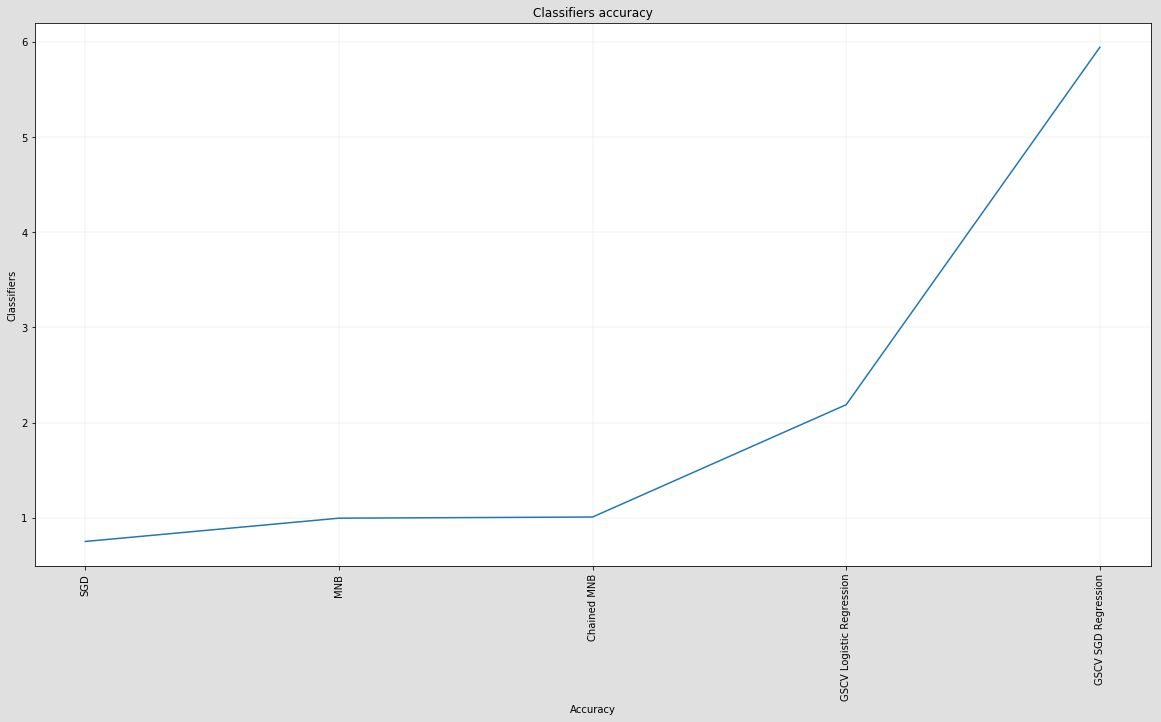

In [52]:
import p6_util_plot
title = "Classifiers accuracy"
p6_util_plot.ser_item_occurency_plot(df_result.Classifier, df_result.Score*100, item_count=None, title=title)